In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [4]:
#y.reshape(len(y),1)
y = y[:, np.newaxis]
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [6]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(x,y)

C:\Users\Nilesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
#sc_y.inverse_transform(reg.predict(sc_x.transform([[6.5]])))
ypred = sc_y.inverse_transform(reg.predict(x))
ypred

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

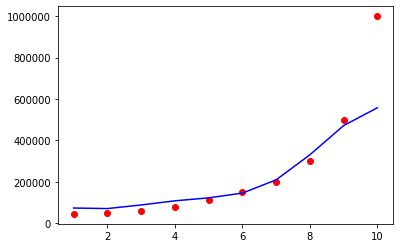

In [19]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y) , color='red')
plt.plot(sc_x.inverse_transform(x), ypred, color='blue')
plt.show()


### Visualisation in higher resolution

In [22]:
xgrid = np.arange(min(x), max(x), 0.01)
xgrid = xgrid.reshape(len(xgrid), 1)
ypred = sc_y.inverse_transform(reg.predict(xgrid))

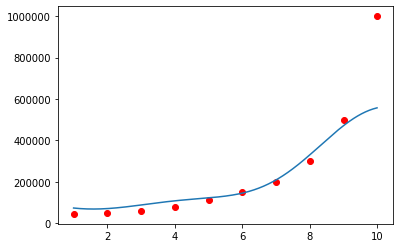

In [24]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(xgrid), ypred)
plt.show()

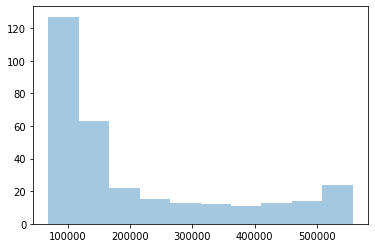

In [28]:
import seaborn as sns
sns.distplot(ypred, kde=False, bins=10)